<a href="https://colab.research.google.com/github/rnlyone/Fastix-Event-Ticketing/blob/main/DataAnalysisNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selamat Datang di Dokumen Analisis Data Tweet dari Tiga Calon Presiden Pemilu 2024.

## Deskripsi Dataset

- Penulis : asno firdaus,
- Versi : 5,
- Sumber : Mendeley Data,
- Judul : Indonesia Presidential Candidate's Dataset, 2024
- Tahun : 2023
- Institusi : Universitas Ahmad Dahlan
- Lisensi : Creative Commons Attribution 4.0 International licence.
- Deskripsi :


> Data mentah diunduh menggunakan pemrograman Python dengan Twitter API. Data berasal dari platform Twitter yang membahas isu calon presiden Indonesia 2024. Total ada 30.000 data dengan rincian masing-masing kandidat sebagai berikut:
- Ganjar Pranowo: October 2022 - April 2023
- Prabowo Subianto: December 2022 - April 2023
- Anies Baswedan: January - April 2023

> Data yang digunakan merupakan data sebelum penetapan calon presiden, namun topik pemilu presiden Indonesia ramai diperbincangkan di media sosial Twitter. Data yang diperoleh akan berguna untuk penelitian selanjutnya sebagai bahan perbandingan dalam menentukan hasil pemilu Presiden Indonesia jika dibandingkan dengan data pada saat penentuan calon dan kampanye serta data setelah terpilih sebagai Presiden (hasil sebenarnya)





# Import Libraries

In [ ]:
!pip install Sastrawi
!pip install transformers

In [ ]:
# Import some libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

from google.colab import drive

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Dataset Preparation

## Load Dataset

In [ ]:
# Mount Google Drive ke Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Dataset Setiap Calon
prabs = pd.read_csv('/content/drive/MyDrive/IMCOM/dataset/labeled/prabowo.csv', encoding='unicode_escape')
ganjar = pd.read_csv('/content/drive/MyDrive/IMCOM/dataset/labeled/ganjar.csv', encoding='unicode_escape')
anies = pd.read_csv('/content/drive/MyDrive/IMCOM/dataset/labeled/anies.csv', encoding='unicode_escape')

## Detail Dataset

### List Kolom

In [ ]:
#List Setiap Kolom dari Dataset (Sama dari setiap calon)
list(prabs.columns)

['Unnamed: 0.1',
 ' Date',
 ' Created',
 ' User ID',
 ' Followers',
 ' Following',
 ' Tweet Count',
 ' TweetLocation',
 'Text',
 'label']

### Preview Dataset

In [ ]:
#Preview Data dari Dataset Anies
anies

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,label
0,0,2023-04-16 10:04:35+00:00,2023-03-27 08:59:57+00:00,1.640000e+18,981,531,22,NaN,anies president info,Positive
1,1,2023-04-16 10:00:01+00:00,2012-08-21 07:34:04+00:00,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",gerindra party politician sandiaga uno answers...,Positive
2,2,2023-04-16 09:14:46+00:00,2011-09-27 05:22:24+00:00,3.807551e+08,11,35,230,North Jakarta,"mr. anies continued, we will guard him until h...",Positive
3,3,2023-04-16 07:03:05+00:00,2017-10-19 12:32:28+00:00,9.210000e+17,37,47,2670,Jakarta,may allah swt save the nation and state of the...,Positive
4,4,2023-04-16 06:03:59+00:00,2022-06-28 07:03:37+00:00,1.540000e+18,6,129,766,"Lebak, Banten","poor chotimah, uncle anies, that's why my fami...",Positive
...,...,...,...,...,...,...,...,...,...,...
9995,9995,2023-01-05 15:36:41+00:00,2018-11-29 01:36:00+00:00,1.070000e+18,1265,763,541856,NaN,there was no turmoil during the construction o...,Negative
9996,9996,2023-01-05 15:16:04+00:00,2018-11-29 01:36:00+00:00,1.070000e+18,1265,763,541856,NaN,"ubedilah mahfud md, the brain behind the cipta...",Negative
9997,9997,2023-01-05 15:12:51+00:00,2022-05-16 12:14:47+00:00,1.530000e+18,1,17,771,Monaco,my president mranies,Negative
9998,9998,2023-01-05 15:07:34+00:00,2022-12-15 23:43:16+00:00,1.600000e+18,30,256,3174,"Central Java, Indonesia",mr anies president,Negative


In [ ]:
#Preview Data dari Dataset Ganjar
ganjar

,Unnamed: 0,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,label
0,0,2023-04-16 09:04:01+00:00,2016-05-28 16:50:39+00:00,7.370000e+17,2358,3001,13665,Indonesia,"ganjar is getting more and more support, now s...",Positive
1,1,2023-04-16 08:31:02+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,ojoo lali yooo who is smart chooses pranowo's ...,Positive
2,2,2023-04-16 08:00:00+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,smart people support and reward pranowo well,Positive
3,3,2023-04-16 07:56:29+00:00,2022-06-27 14:13:32+00:00,1.540000e+18,11,78,737,NaN,we believe that pranowo's reward is a gift fro...,Positive
4,4,2023-04-16 07:54:14+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,intelligent people support and reward pranowo ...,Positive
...,...,...,...,...,...,...,...,...,...,...
9995,9995,2022-10-27 03:35:39+00:00,2022-10-16 02:01:06+00:00,1.580000e+18,8,6,414,"Central Java, Indonesia",rt ganjaristdltras ganjarist deltras east java...,Positive
9996,9996,2022-10-27 03:32:08+00:00,2012-05-14 04:51:09+00:00,5.795586e+08,41,149,3662,West Java,meaning reward pranowo the president,Positive
9997,9997,2022-10-27 03:31:56+00:00,2022-06-25 02:18:44+00:00,1.540000e+18,149,844,2245,NaN,more and more people are ready to support ganj...,Positive
9998,9998,2022-10-27 03:25:07+00:00,2022-10-16 02:04:04+00:00,1.580000e+18,40,63,25,"Central Java, Indonesia",rt ganjaristdltras ganjarist deltras east java...,Positive


In [ ]:
#Preview Data dari Dataset Prabowo
prabs

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,label
0,0,2023-04-16 09:44:01+00:00,2018-07-07 09:43:19+00:00,1.020000e+18,477,337,12568,Khoiril Anwar,gemira and semeton bali muslims declare suppor...,Positive
1,1,2023-04-16 09:27:10+00:00,2019-10-29 04:40:11+00:00,1.190000e+18,27910,20171,63723,NaN,fahnoor inismyname that's why we support the p...,Negative
2,2,2023-04-16 08:32:06+00:00,2022-12-16 05:02:00+00:00,1.600000e+18,144,114,6596,NaN,"this time, jokowi's quota for wrinkles on his ...",Positive
3,3,2023-04-16 08:19:16+00:00,2016-01-11 23:57:34+00:00,4.745574e+09,67,99,7395,NaN,"happy birthday to kopassus, may the spirit of ...",Positive
4,4,2023-04-16 07:59:41+00:00,2022-12-17 02:29:03+00:00,1.600000e+18,31,27,192,NaN,gerindra badung party held legislative legisla...,Negative
...,...,...,...,...,...,...,...,...,...,...
9995,9995,2022-12-08 08:32:40+00:00,2016-09-30 15:25:40+00:00,7.820000e+17,50,104,4398,"East Kalimantan, Indonesia","sir, if the community always goes down, it wil...",Positive
9996,9996,2022-12-08 08:26:00+00:00,2022-11-07 06:41:27+00:00,1.590000e+18,23,122,131,Yogyakarta,"young prabowo is really cool, bismillah sir, g...",Positive
9997,9997,2022-12-08 08:06:00+00:00,2022-12-01 13:23:45+00:00,1.600000e+18,11,3,67,Surabaya,"basically, prabowo is great and was chosen as ...",Positive
9998,9998,2022-12-08 08:05:00+00:00,2022-12-02 02:44:35+00:00,1.600000e+18,50,83,103,NaN,optimistic about being the best figure in the ...,Positive


### Statistik Dataset

In [51]:
anies.describe()

,Unnamed: 0.1,User ID,Followers,Following,Tweet Count,Year
count,10000.00000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000
mean,4999.50000,1.145152e+18,9.617821e+04,660.131500,3.983860e+04,2019.258500
std,2886.89568,5.893016e+17,1.111283e+06,3367.823764,1.770819e+05,4.107014
min,0.00000,1.712898e+07,0.000000e+00,0.000000,1.000000e+00,2008.000000
25%,2499.75000,9.750000e+17,3.300000e+01,23.000000,1.083750e+03,2018.000000
50%,4999.50000,1.480000e+18,2.490000e+02,143.000000,5.085000e+03,2022.000000
75%,7499.25000,1.540000e+18,5.140000e+02,495.000000,3.492400e+04,2022.000000
max,9999.00000,1.650000e+18,2.018897e+07,297570.000000,2.310131e+06,2023.000000


In [52]:
prabs.describe()

,Unnamed: 0.1,User ID,Followers,Following,Tweet Count,Year
count,10000.00000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000
mean,4999.50000,1.184033e+18,3.883081e+04,572.678700,2.246595e+04,2019.670500
std,2886.89568,6.152175e+17,6.040177e+05,2399.881895,1.245872e+05,4.099416
min,0.00000,1.493422e+07,0.000000e+00,0.000000,1.000000e+00,2008.000000
25%,2499.75000,1.030000e+18,2.500000e+01,47.000000,7.152500e+02,2018.000000
50%,4999.50000,1.520000e+18,5.800000e+01,103.000000,3.313000e+03,2022.000000
75%,7499.25000,1.610000e+18,1.440000e+02,177.000000,1.381600e+04,2022.000000
max,9999.00000,1.640000e+18,2.018888e+07,24916.000000,2.310129e+06,2023.000000


In [53]:
ganjar.describe()

,Unnamed: 0,User ID,Followers,Following,Tweet Count,Year
count,10000.00000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000
mean,4999.50000,1.217832e+18,7.973599e+04,1074.374200,4.505793e+04,2019.729200
std,2886.89568,5.746235e+17,8.812152e+05,2766.216555,2.002963e+05,3.918546
min,0.00000,1.270110e+07,0.000000e+00,0.000000,1.000000e+00,2008.000000
25%,2499.75000,1.160000e+18,1.600000e+01,20.000000,3.330000e+02,2019.000000
50%,4999.50000,1.520000e+18,6.300000e+01,92.000000,1.138000e+03,2022.000000
75%,7499.25000,1.570000e+18,7.140000e+02,524.250000,6.778250e+03,2022.000000
max,9999.00000,1.650000e+18,2.018873e+07,65564.000000,2.310112e+06,2023.000000



#### Analisis:
Analisis data pada dataset Anies, Prabowo, dan Ganjar menunjukkan perbedaan dalam jumlah followers, following, dan tweet count pada Topik Twitter mereka. Berikut adalah beberapa observasi yang dapat ditarik dari ketiga dataset tersebut:

1. Followers:
> Rata-rata jumlah followers tertinggi dimiliki oleh Topik Ganjar dengan sekitar 79,736 followers, diikuti oleh Anies dengan 96,178 followers, dan Prabowo dengan 38,831 followers.
Ganjar juga memiliki nilai maksimum followers yang paling tinggi, mencapai sekitar 20,188,730, diikuti oleh Anies dan Prabowo.



2. Following:
> Rata-rata jumlah following tertinggi dimiliki oleh Topik Ganjar dengan sekitar 1,074 following, diikuti oleh Anies dengan 660 following, dan Prabowo dengan 573 following.
Nilai maksimum following tertinggi juga dimiliki oleh Ganjar, mencapai 65,564, sementara Prabowo dan Anies memiliki jumlah maksimum following yang lebih rendah.



3. Tweet Count:
> Rata-rata jumlah tweet count tertinggi dimiliki oleh Topik Anies dengan sekitar 39,839 tweet, diikuti oleh Ganjar dengan 45,058 tweet, dan Prabowo dengan 22,466 tweet.
Nilai maksimum tweet count tertinggi dimiliki oleh Anies, mencapai 2,310,131 tweet, diikuti oleh Ganjar dan Prabowo.



Dapat dilihat bahwa dataset Anies memiliki tweet count yang lebih tinggi secara rata-rata dan maksimum dibandingkan dengan Prabowo dan Ganjar.
Ganjar memiliki rata-rata followers dan following yang lebih tinggi daripada Anies dan Prabowo.
Prabowo memiliki nilai standar deviasi (std) yang lebih rendah pada kolom Followers dan Following, menunjukkan bahwa data tersebut cenderung lebih terkonsentrasi di sekitar rata-rata.
Dalam keseluruhan analisis, terdapat variasi yang signifikan antara ketiga Topik Twitter, baik dalam hal popularitas (followers), interaksi (following), maupun aktivitas (tweet count). Ganjar cenderung memiliki pengikut dan jumlah following yang lebih tinggi, Anies memiliki aktivitas tweet yang paling tinggi, sementara Prabowo memiliki distribusi yang lebih terkonsentrasi pada followers dan following-nya.

# Exploratory Data Analysis

### Pemeringkatan Jumlah Retweet dan Totalnya

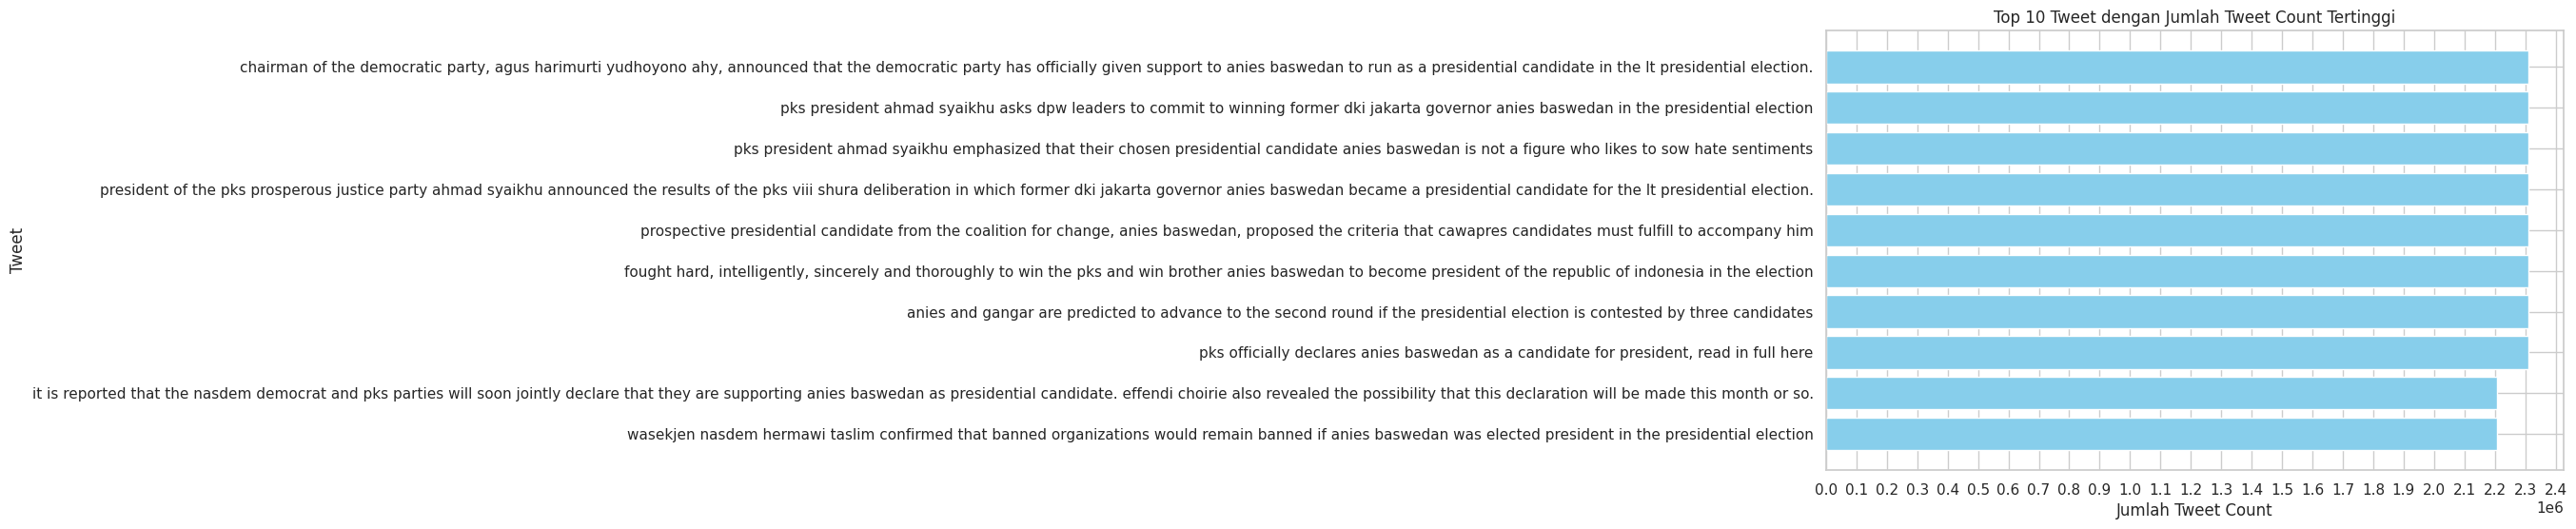

In [ ]:
# Mengurutkan DataFrame berdasarkan 'Tweet Count' secara descending
anies_top = anies.sort_values(by=' Tweet Count', ascending=False).reset_index(drop=True)

# Mengambil 10 tweet teratas
top_10_anies = anies_top.head(10)

# Membuat plot horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_anies['Text'], top_10_anies[' Tweet Count'], color='skyblue')
plt.xlabel('Jumlah Tweet Count')
plt.ylabel('Tweet')
plt.title('Top 10 Tweet dengan Jumlah Tweet Count Tertinggi')

# Menetapkan nilai xticks dengan interval per 100rb
interval = 100000
xticks_values = range(0, 2500000, interval)
plt.xticks(xticks_values)

plt.gca().invert_yaxis()  # Invert y-axis agar tweet teratas berada di bagian atas
plt.show()

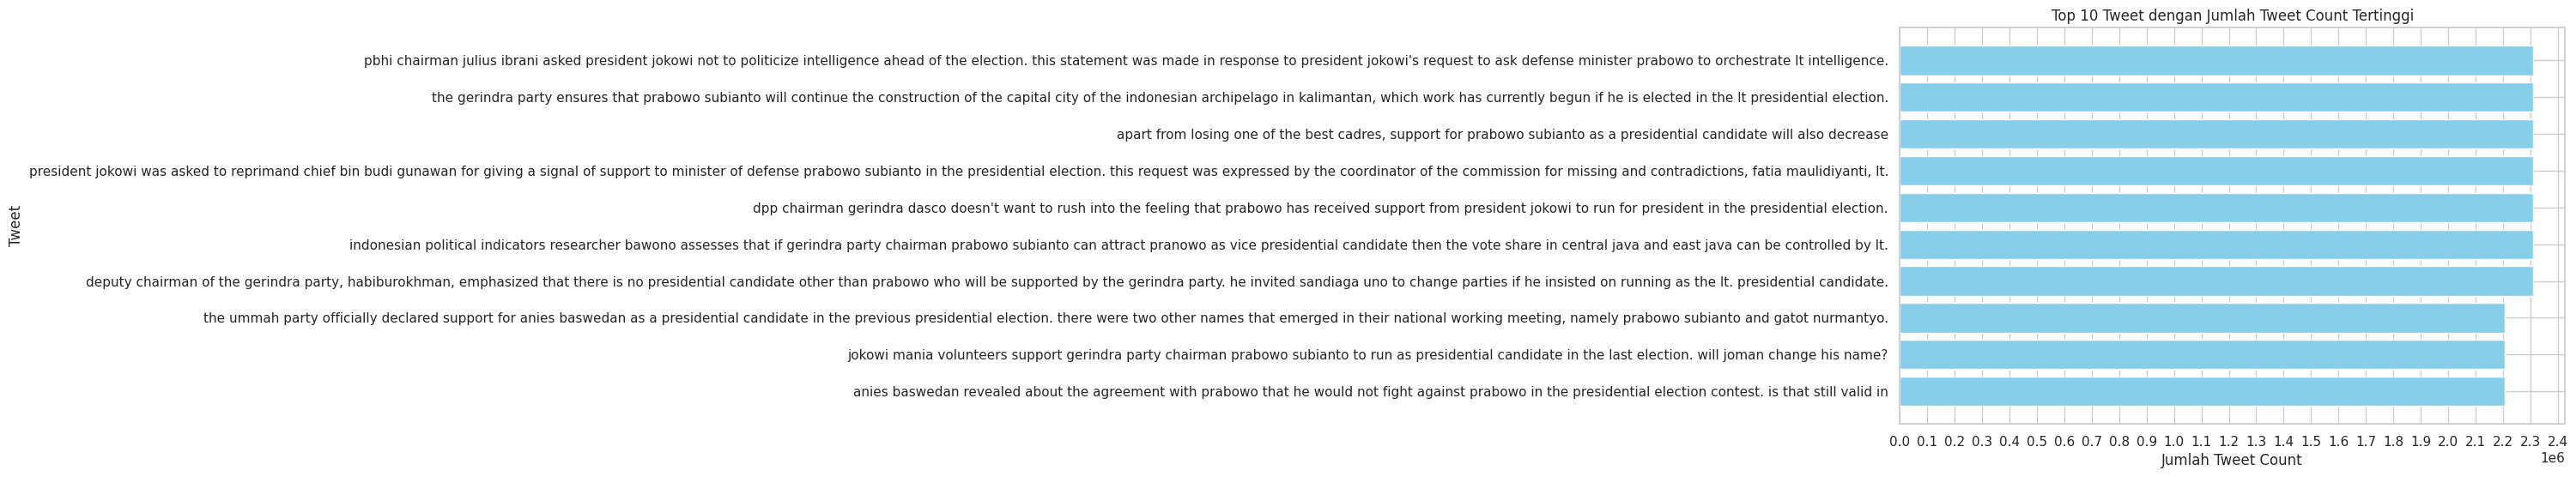

In [ ]:
# Mengurutkan DataFrame berdasarkan 'Tweet Count' secara descending
prabs_top = prabs.sort_values(by=' Tweet Count', ascending=False).reset_index(drop=True)

# Mengambil 10 tweet teratas
top_10_prabs = prabs_top.head(10)

# Membuat plot horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_prabs['Text'], top_10_prabs[' Tweet Count'], color='skyblue')
plt.xlabel('Jumlah Tweet Count')
plt.ylabel('Tweet')
plt.title('Top 10 Tweet dengan Jumlah Tweet Count Tertinggi')

# Menetapkan nilai xticks dengan interval per 100rb
interval = 100000
xticks_values = range(0, 2500000, interval)
plt.xticks(xticks_values)

plt.gca().invert_yaxis()  # Invert y-axis agar tweet teratas berada di bagian atas
plt.show()

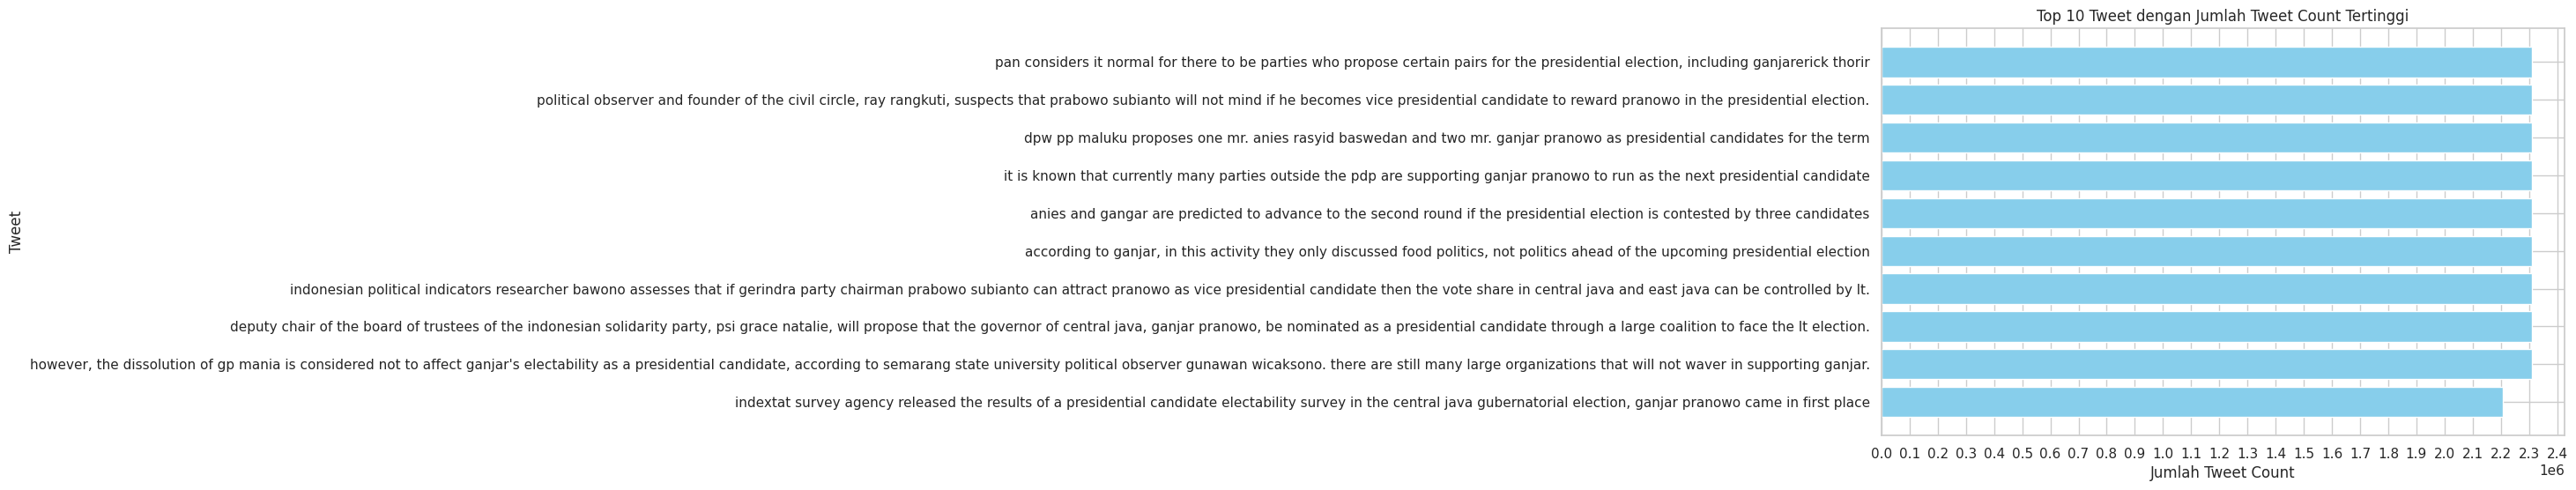

In [ ]:
# Mengurutkan DataFrame berdasarkan 'Tweet Count' secara descending
ganjar_top = ganjar.sort_values(by=' Tweet Count', ascending=False).reset_index(drop=True)

# Mengambil 10 tweet teratas
top_10_ganjar = ganjar_top.head(10)

# Membuat plot horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_ganjar['Text'], top_10_ganjar[' Tweet Count'], color='skyblue')
plt.xlabel('Jumlah Tweet Count')
plt.ylabel('Tweet')
plt.title('Top 10 Tweet dengan Jumlah Tweet Count Tertinggi')

# Menetapkan nilai xticks dengan interval per 100rb
interval = 100000
xticks_values = range(0, 2500000, interval)
plt.xticks(xticks_values)

plt.gca().invert_yaxis()  # Invert y-axis agar tweet teratas berada di bagian atas
plt.show()

### Analisis Sentimen

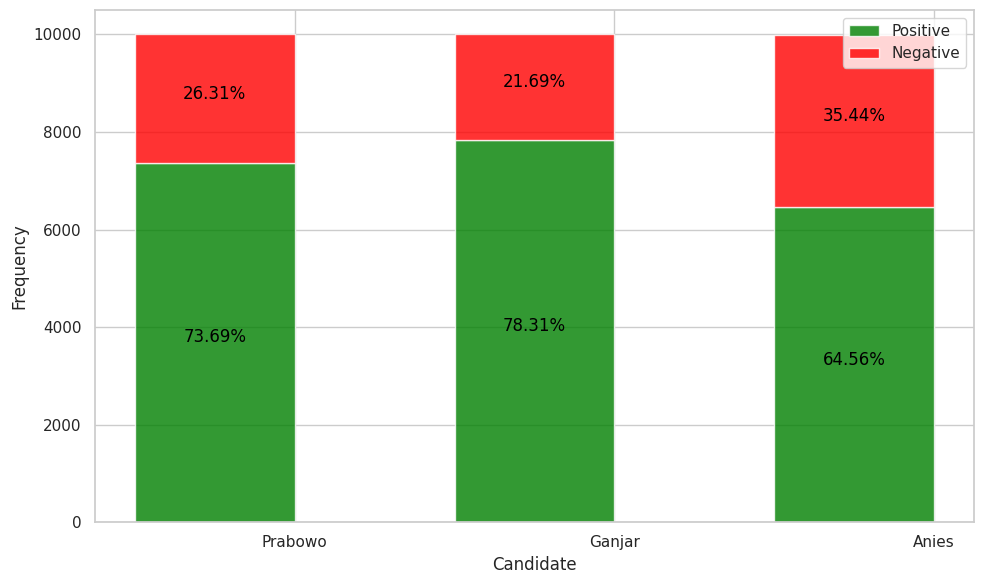

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah label "positive" dan "negative" untuk masing-masing kandidat
prabowo_label_1 = len(prabs[prabs['label'] == 'Positive'])
prabowo_label_0 = len(prabs[prabs['label'] == 'Negative'])
ganjar_label_1 = len(ganjar[ganjar['label'] == 'Positive'])
ganjar_label_0 = len(ganjar[ganjar['label'] == 'Negative'])
anies_label_1 = len(anies[anies['label'] == 'Positive'])
anies_label_0 = len(anies[anies['label'] == 'Negative'])

# Data untuk plotting
candidates = ['Prabowo', 'Ganjar', 'Anies']
label_1 = [prabowo_label_1, ganjar_label_1, anies_label_1]
label_0 = [prabowo_label_0, ganjar_label_0, anies_label_0]

# Menghitung total frekuensi untuk setiap kandidat
total_frequencies = [label_1[i] + label_0[i] for i in range(len(candidates))]

# Plotting histogram tumpuk
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.50
index = range(len(candidates))

bar1 = ax.bar(index, label_1, bar_width, label='Positive', alpha=0.8, color='green')
bar2 = ax.bar(index, label_0, bar_width, label='Negative', alpha=0.8, color='red', bottom=label_1)

ax.set_xlabel('Candidate')
ax.set_ylabel('Frequency')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(candidates)
ax.legend()

# Menambahkan persentase positif dan negatif di dalam setiap bar
for i in range(len(candidates)):
    total_freq = total_frequencies[i]
    plt.text(i, label_1[i] / 2, f"{(label_1[i]/total_freq*100):.2f}%", ha='center', fontsize=12, color='black')
    plt.text(i, label_1[i] + label_0[i] / 2, f"{(label_0[i]/total_freq*100):.2f}%", ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


Berdasarkan **chart sentimen** yang ditampilkan, berikut adalah analisisnya:

1. **Prabowo**:
   - Sentimen positif: **73.69%**
   - Sentimen negatif: **26.31%**
   - Mayoritas opini publik cenderung positif terhadap Prabowo.

2. **Ganjar**:
   - Sentimen positif tertinggi: **78.31%**
   - Sentimen negatif: **21.69%**
   - Ganjar memiliki popularitas dan penerimaan yang baik di mata publik.

3. **Anies**:
   - Sentimen positif: **64.56%**
   - Sentimen negatif tertinggi: **35.44%**
   - Meskipun mayoritas sentimen positif, Anies memiliki proporsi sentimen negatif yang signifikan.

Chart ini memberikan gambaran tentang bagaimana opini publik terhadap ketiga calon presiden pada tahun 2024. Ganjar menonjol dengan sentimen positif tertinggi, sementara Anies memiliki isu kontroversial yang mempengaruhi citranya. Prabowo juga mendapatkan dukungan positif yang kuat.

### Rentang Waktu Aktivitas Pengguna Twitter

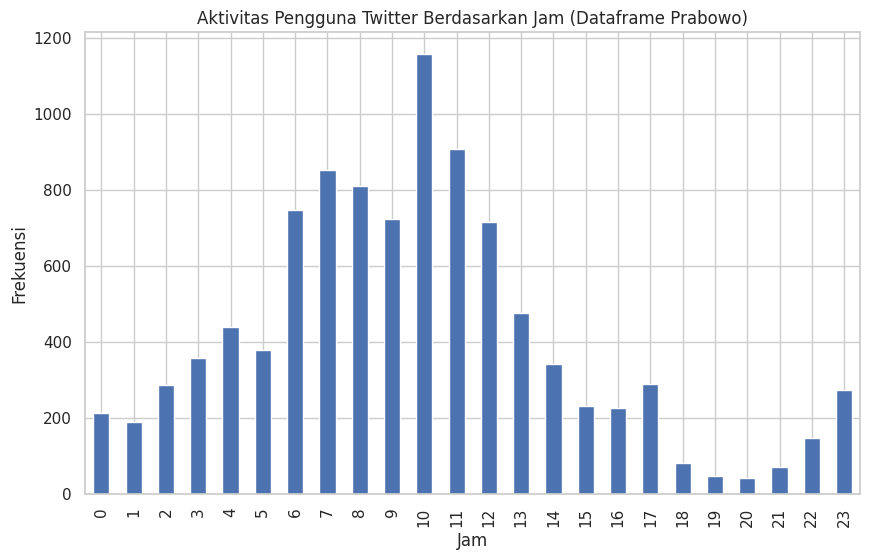

In [ ]:
# Mengubah kolom 'Date' menjadi tipe data datetime
prabs[' Date'] = pd.to_datetime(prabs[' Date'])

# Menghilangkan zona waktu dari kolom ' Date'
prabs[' Date'] = prabs[' Date'].dt.tz_localize(None)

# Menghitung frekuensi penggunaan setiap jam
hourly_counts = prabs[' Date'].dt.hour.value_counts().sort_index()

# Membuat plot
hourly_counts.plot(kind='bar', figsize=(10, 6))

# Menambahkan label-label
plt.title('Aktivitas Pengguna Twitter Berdasarkan Jam (Dataframe Prabowo)')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.xticks(range(24))  # Menampilkan label jam

# Menampilkan plot
plt.show()

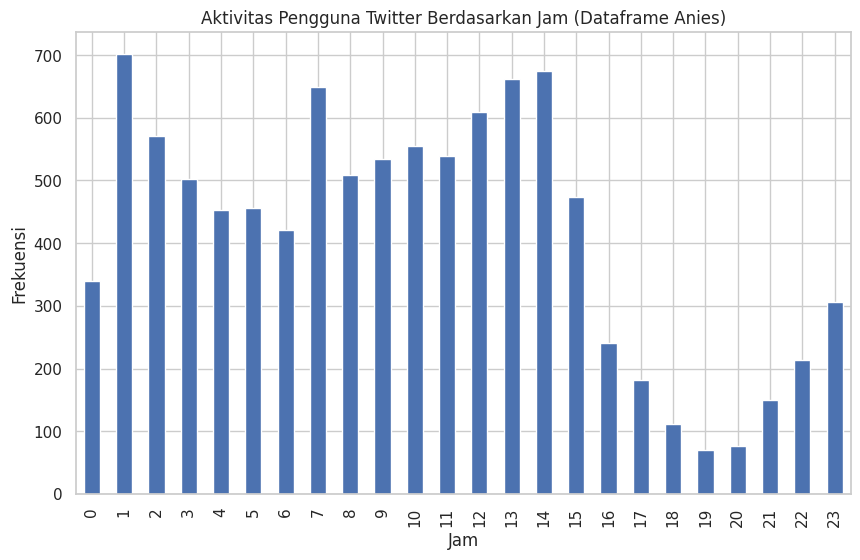

In [ ]:
# Mengubah kolom 'Date' menjadi tipe data datetime
anies[' Date'] = pd.to_datetime(anies[' Date'])

# Menghilangkan zona waktu dari kolom ' Date'
anies[' Date'] = anies[' Date'].dt.tz_localize(None)

# Menghitung frekuensi penggunaan setiap jam
hourly_counts = anies[' Date'].dt.hour.value_counts().sort_index()

# Membuat plot
hourly_counts.plot(kind='bar', figsize=(10, 6))

# Menambahkan label-label
plt.title('Aktivitas Pengguna Twitter Berdasarkan Jam (Dataframe Anies)')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.xticks(range(24))  # Menampilkan label jam

# Menampilkan plot
plt.show()

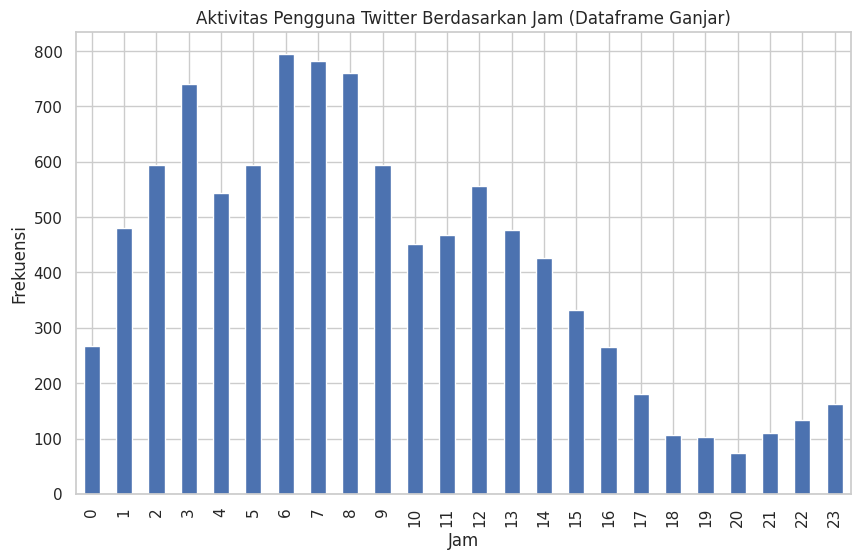

In [ ]:
# Mengubah kolom 'Date' menjadi tipe data datetime
ganjar[' Date'] = pd.to_datetime(ganjar[' Date'])

# Menghilangkan zona waktu dari kolom ' Date'
ganjar[' Date'] = ganjar[' Date'].dt.tz_localize(None)

# Menghitung frekuensi penggunaan setiap jam
hourly_counts = ganjar[' Date'].dt.hour.value_counts().sort_index()

# Membuat plot
hourly_counts.plot(kind='bar', figsize=(10, 6))

# Menambahkan label-label
plt.title('Aktivitas Pengguna Twitter Berdasarkan Jam (Dataframe Ganjar)')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.xticks(range(24))  # Menampilkan label jam

# Menampilkan plot
plt.show()

Dari **grafik histogram** yang ditampilkan, kita dapat mengamati pola aktivitas pengguna Twitter pada tiga dataset yang berbeda (Prabowo, Anies, dan Ganjar). Berikut adalah analisisnya:

1. **Dataset Prabowo**:
   - Aktivitas pengguna mencapai puncak pada jam 9 dengan frekuensi sekitar **1200 tweets**. Ada penurunan signifikan setelah itu dan aktivitas tetap rendah sepanjang hari.
   - **Kesimpulan**: Prabowo memiliki puncak aktivitas di pagi hari.

2. **Dataset Anies**:
   - Pola aktivitas lebih tersebar dengan dua puncak; satu di jam 8-9 dan satu lagi di jam 14-15. Aktivitas menurun setelah jam 15.
   - **Kesimpulan**: Anies memiliki dua periode aktif, pagi dan sore.

3. **Dataset Ganjar**:
   - Mirip dengan dataset Anies, ada dua puncak aktivitas yaitu pada jam 8-9 dan 14-15. Namun, penurunan aktivitas setelah jam puncak kedua lebih drastis dibandingkan dengan dataset Anies.
   - **Kesimpulan**: Ganjar juga aktif di pagi dan sore hari.

### Distribusi Tweet dari Setiap Dataset Berdasarkan Tanggal Tweetnya

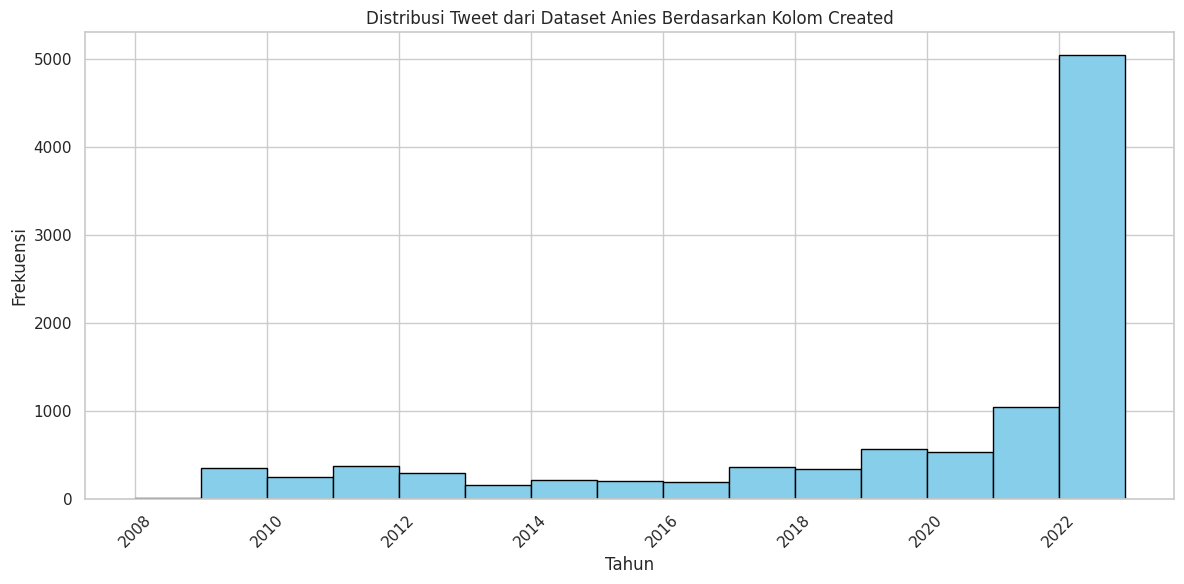

In [50]:
anies['Created'] = pd.to_datetime(anies[' Created'], errors='coerce')

# Memeriksa apakah konversi ke datetime berhasil
if anies['Created'].isnull().any():
    print("Error: Konversi ke datetime tidak berhasil.")
else:
    anies['Year'] = anies['Created'].dt.year  # Menambahkan kolom Year berdasarkan tanggal

    plt.figure(figsize=(12, 6))
    plt.hist(anies['Year'], bins=range(anies['Year'].min(), anies['Year'].max() + 1), color='skyblue', edgecolor='black')
    plt.title('Distribusi Tweet dari Dataset Anies Berdasarkan Kolom Created')
    plt.xlabel('Tahun')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

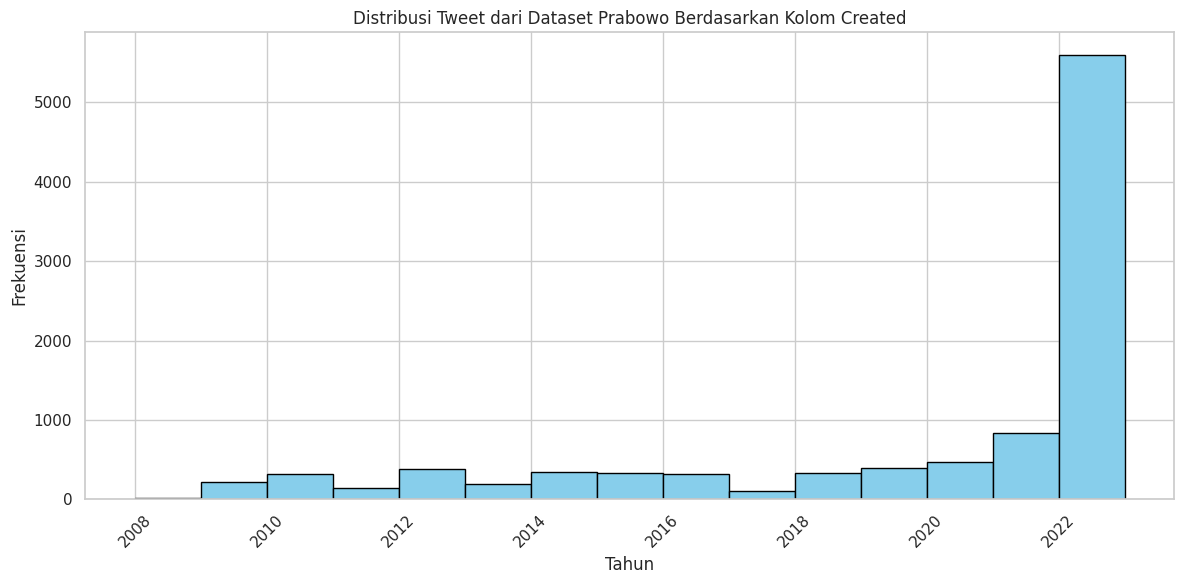

In [44]:
prabs['Created'] = pd.to_datetime(prabs[' Created'], errors='coerce')

# Memeriksa apakah konversi ke datetime berhasil
if prabs['Created'].isnull().any():
    print("Error: Konversi ke datetime tidak berhasil.")
else:
    prabs['Year'] = prabs['Created'].dt.year  # Menambahkan kolom Year berdasarkan tanggal

    plt.figure(figsize=(12, 6))
    plt.hist(prabs['Year'], bins=range(prabs['Year'].min(), prabs['Year'].max() + 1), color='skyblue', edgecolor='black')
    plt.title('Distribusi Tweet dari Dataset Prabowo Berdasarkan Kolom Created')
    plt.xlabel('Tahun')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

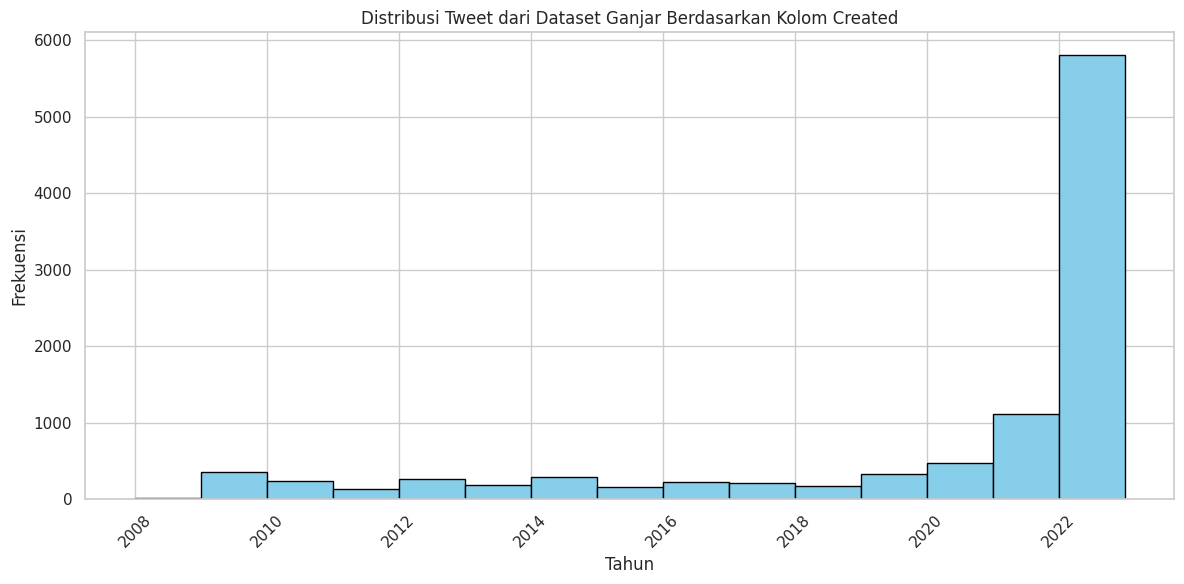

In [45]:
ganjar['Created'] = pd.to_datetime(ganjar[' Created'], errors='coerce')

# Memeriksa apakah konversi ke datetime berhasil
if ganjar['Created'].isnull().any():
    print("Error: Konversi ke datetime tidak berhasil.")
else:
    ganjar['Year'] = ganjar['Created'].dt.year  # Menambahkan kolom Year berdasarkan tanggal

    plt.figure(figsize=(12, 6))
    plt.hist(ganjar['Year'], bins=range(ganjar['Year'].min(), ganjar['Year'].max() + 1), color='skyblue', edgecolor='black')
    plt.title('Distribusi Tweet dari Dataset Ganjar Berdasarkan Kolom Created')
    plt.xlabel('Tahun')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Dari **histogram** yang ditampilkan, kita dapat mengamati bahwa distribusi tweet berdasarkan tanggal pembuatannya memiliki pola yang serupa di ketiga dataset (Anies, Prabowo, dan Ganjar). Berikut adalah analisisnya:

1. **Dataset Prabowo**:
   - Aktivitas pengguna mencapai puncak pada tahun **2022** dengan frekuensi sekitar **5000 tweets**. Sebelum tahun tersebut, jumlah tweet relatif sedikit dengan beberapa peningkatan kecil pada tahun-tahun tertentu.
   - **Kesimpulan**: Prabowo mengalami lonjakan aktivitas tweet yang signifikan pada tahun 2022.

2. **Dataset Anies**:
   - Pola aktivitas serupa dengan dataset Prabowo. Aktivitas tweet juga meningkat tajam pada tahun **2022**, meskipun jumlah tweet sebelumnya lebih rendah.
   - **Kesimpulan**: Anies juga mengalami peningkatan aktivitas tweet yang mencolok pada tahun 2022.

3. **Dataset Ganjar**:
   - Mirip dengan dataset Anies dan Prabowo, Ganjar juga mengalami peningkatan aktivitas tweet yang drastis pada tahun **2022**.
   - **Kesimpulan**: Ganjar memiliki tren yang serupa dengan dua kandidat lainnya, dengan lonjakan tweet pada tahun 2022.

Dengan demikian, tahun **2022** menjadi momen penting dalam aktivitas tweet ketiga calon presiden ini.